In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('archive/movies.csv', index_col='movieId')

In [3]:
df.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9742 entries, 1 to 193609
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   9742 non-null   object
 1   genres  9742 non-null   object
dtypes: object(2)
memory usage: 228.3+ KB


### Creating a release date column from the title

In [5]:
df.columns = df.columns.str.capitalize()

In [6]:
df["Release Year"] = df["Title"].str.extract(r"\((\d{4})\)")


In [7]:
df['Main Genre'] = df['Genres'].str.split('|').str[0]
df

,Title,Genres,Release Year,Main Genre
movieId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,Adventure
2,Jumanji (1995),Adventure|Children|Fantasy,1995,Adventure
3,Grumpier Old Men (1995),Comedy|Romance,1995,Comedy
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,Comedy
5,Father of the Bride Part II (1995),Comedy,1995,Comedy
...,...,...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017,Action
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017,Animation
193585,Flint (2017),Drama,2017,Drama


# Data Cleaning

In [8]:
print('Number of missing values:', df.isna().sum().sum())
print('Number of duplicates:', df.duplicated().sum())

Number of missing values: 13
Number of duplicates: 0


In [9]:
#Removing the release year from the title
df['Title']= df['Title'].apply(lambda x: x.split('(')[0].strip())



### Filling missing values by mapping 

In [10]:
mapping_dict ={'Babylon 5': 1994, 'Ready Player One':2018, 'Hyena Road':2015,
       'The Adventures of Sherlock Holmes and Doctor Watson': 1980,
       'Nocturnal Animals':2016, 'Paterson':2016, 'Moonlight':2016, 'The OA':2016, 'Cosmos':2014,
       'Maria Bamford: Old Baby':2017, 'Death Note: Desu nôto': 2006,
       'Generation Iron 2':2017, 'Black Mirror':2011}

df.loc[df["Release Year"].isna(), "Release Year"] = df["Title"].map(mapping_dict)

df.drop(df[df["Title"] == 'Death Note: Desu nôto (2006–2007)'].index, inplace=True)


### Converting release year to datetime

Since it's originally a string (object), note that missing values had to be handled first because NaN (np.nan) is considered a float

In [11]:
df['Release Year'] = df['Release Year'].astype(int) 
df['Release Year'] = pd.to_datetime(df['Release Year'], format = '%Y', errors='coerce').dt.year

# EDA

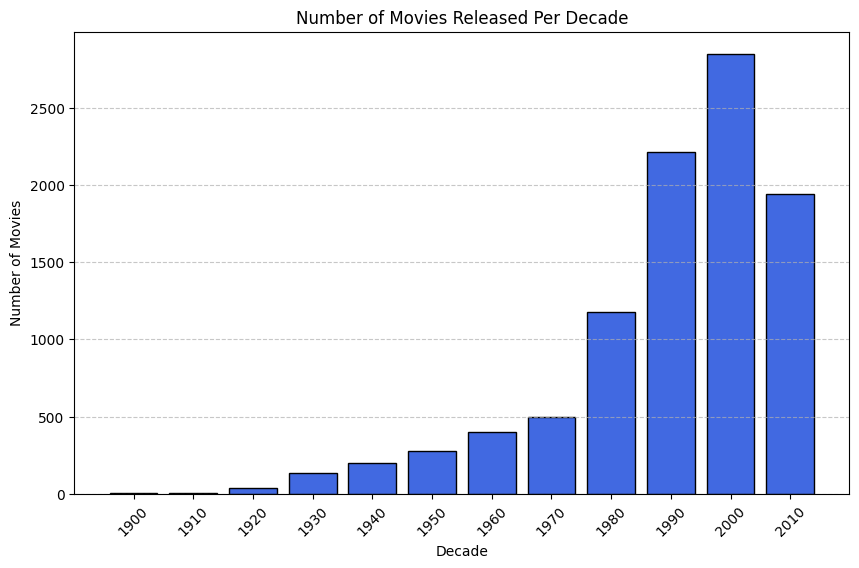

In [12]:

df['Decade'] = (df['Release Year'] // 10) * 10  # Convert year to decade
decade_counts = df['Decade'].value_counts().sort_index()  # Count movies per decade

plt.figure(figsize=(10, 6))
plt.bar(decade_counts.index, decade_counts.values, width=8, color='royalblue', edgecolor='black')

plt.title('Number of Movies Released Per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.xticks(decade_counts.index, rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

How many comedy movies are released between `2010` and `2020`?

In [13]:
df[(df['Genres'].str.contains('Comedy')) & ((df['Release Year'] > 2010) & (df['Release Year'] < 2020))]

,Title,Genres,Release Year,Main Genre,Decade
movieId,,,,,
83349,"Green Hornet, The",Action|Comedy|Crime|Fantasy|Thriller|IMAX,2011,Action,2010
83910,"Dilemma, The",Comedy|Drama,2011,Comedy,2010
84374,No Strings Attached,Comedy|Romance,2011,Comedy,2010
84615,Cedar Rapids,Comedy,2011,Comedy,2010
84637,Gnomeo & Juliet,Adventure|Animation|Children|Comedy|Fantasy|Ro...,2011,Adventure,2010
...,...,...,...,...,...
190209,Jeff Ross Roasts the Border,Comedy,2017,Comedy,2010
191005,Gintama,Action|Adventure|Comedy|Sci-Fi,2017,Action,2010
193571,Silver Spoon,Comedy|Drama,2014,Comedy,2010


How many animated films are in the dataset?

In [14]:
animation_df = df.loc[df['Genres'].str.contains('Animation')]
print('The number of animated films are:',len(animation_df))
animation_df

The number of animated films are: 611


,Title,Genres,Release Year,Main Genre,Decade
movieId,,,,,
1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,Adventure,1990
13,Balto,Adventure|Animation|Children,1995,Adventure,1990
48,Pocahontas,Animation|Children|Drama|Musical|Romance,1995,Animation,1990
239,"Goofy Movie, A",Animation|Children|Comedy|Romance,1995,Animation,1990
313,"Swan Princess, The",Animation|Children,1994,Animation,1990
...,...,...,...,...,...
193567,anohana: The Flower We Saw That Day - The Movie,Animation|Drama,2013,Animation,2010
193573,Love Live! The School Idol Movie,Animation,2015,Animation,2010
193581,Black Butler: Book of the Atlantic,Action|Animation|Comedy|Fantasy,2017,Action,2010


Movies that are in IMAX?

In [15]:
df[df['Genres'].str.contains('IMAX')].sort_values(by='Release Year', ascending=False)

,Title,Genres,Release Year,Main Genre,Decade
movieId,,,,,
122886,Star Wars: Episode VII - The Force Awakens,Action|Adventure|Fantasy|Sci-Fi|IMAX,2015,Action,2010
108689,"I, Frankenstein",Action|Fantasy|Sci-Fi|IMAX,2014,Action,2010
109487,Interstellar,Sci-Fi|IMAX,2014,Sci-Fi,2010
109673,300: Rise of an Empire,Action|Drama|War|IMAX,2014,Action,2010
109850,Need for Speed,Action|Crime|Drama|IMAX,2014,Action,2010
...,...,...,...,...,...
150,Apollo 13,Adventure|Drama|IMAX,1995,Adventure,1990
4458,Africa: The Serengeti,Documentary|IMAX,1994,Documentary,1990
364,"Lion King, The",Adventure|Animation|Children|Drama|Musical|IMAX,1994,Adventure,1990


First movie in IMAX?

In [16]:
df[df['Genres'].str.contains('IMAX')].sort_values(by='Release Year', ascending=True).head(1)

,Title,Genres,Release Year,Main Genre,Decade
movieId,,,,,
595,Beauty and the Beast,Animation|Children|Fantasy|Musical|Romance|IMAX,1991,Animation,1990


### Extracting first sub-genre for visualization

In [17]:
main_genre = df[['Title','Genres']].copy()  
main_genre['Main Genre'] = df['Genres'].str.split('|').str[0]
main_genre['Main Genre'].value_counts()


Main Genre
Comedy                2779
Drama                 2226
Action                1828
Adventure              653
Crime                  537
Horror                 468
Documentary            386
Animation              298
Children               197
Thriller                84
Sci-Fi                  62
Mystery                 48
Fantasy                 42
Romance                 38
(no genres listed)      34
Musical                 23
Western                 23
Film-Noir               12
War                      4
Name: count, dtype: int64

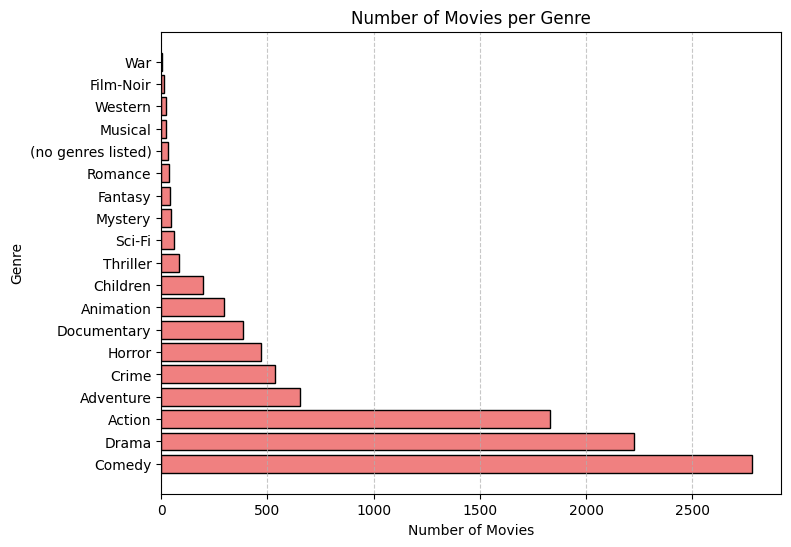

In [18]:
genre_counts = df['Main Genre'].value_counts()
plt.figure(figsize=(8, 6))
plt.barh(genre_counts.index, genre_counts.values, color='lightcoral', edgecolor='black')

plt.title('Number of Movies per Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

Which year had the most releases?

In [19]:
print('The year with the most releases is:',df['Release Year'].mode()[0])
print('With a total of',(df['Release Year'] == 2002).sum(),'movie.')

The year with the most releases is: 2002
With a total of 311 movie.
